In [174]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.signal
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,explained_variance_score,r2_score
from pandas import DataFrame
from scipy.signal import savgol_filter

In [175]:
FLT_1 = pd.read_excel('FLT 1 datasets.xlsx')
data_x = FLT_1.iloc[:,0:7]
data_y = FLT_1.iloc[:,7:10]


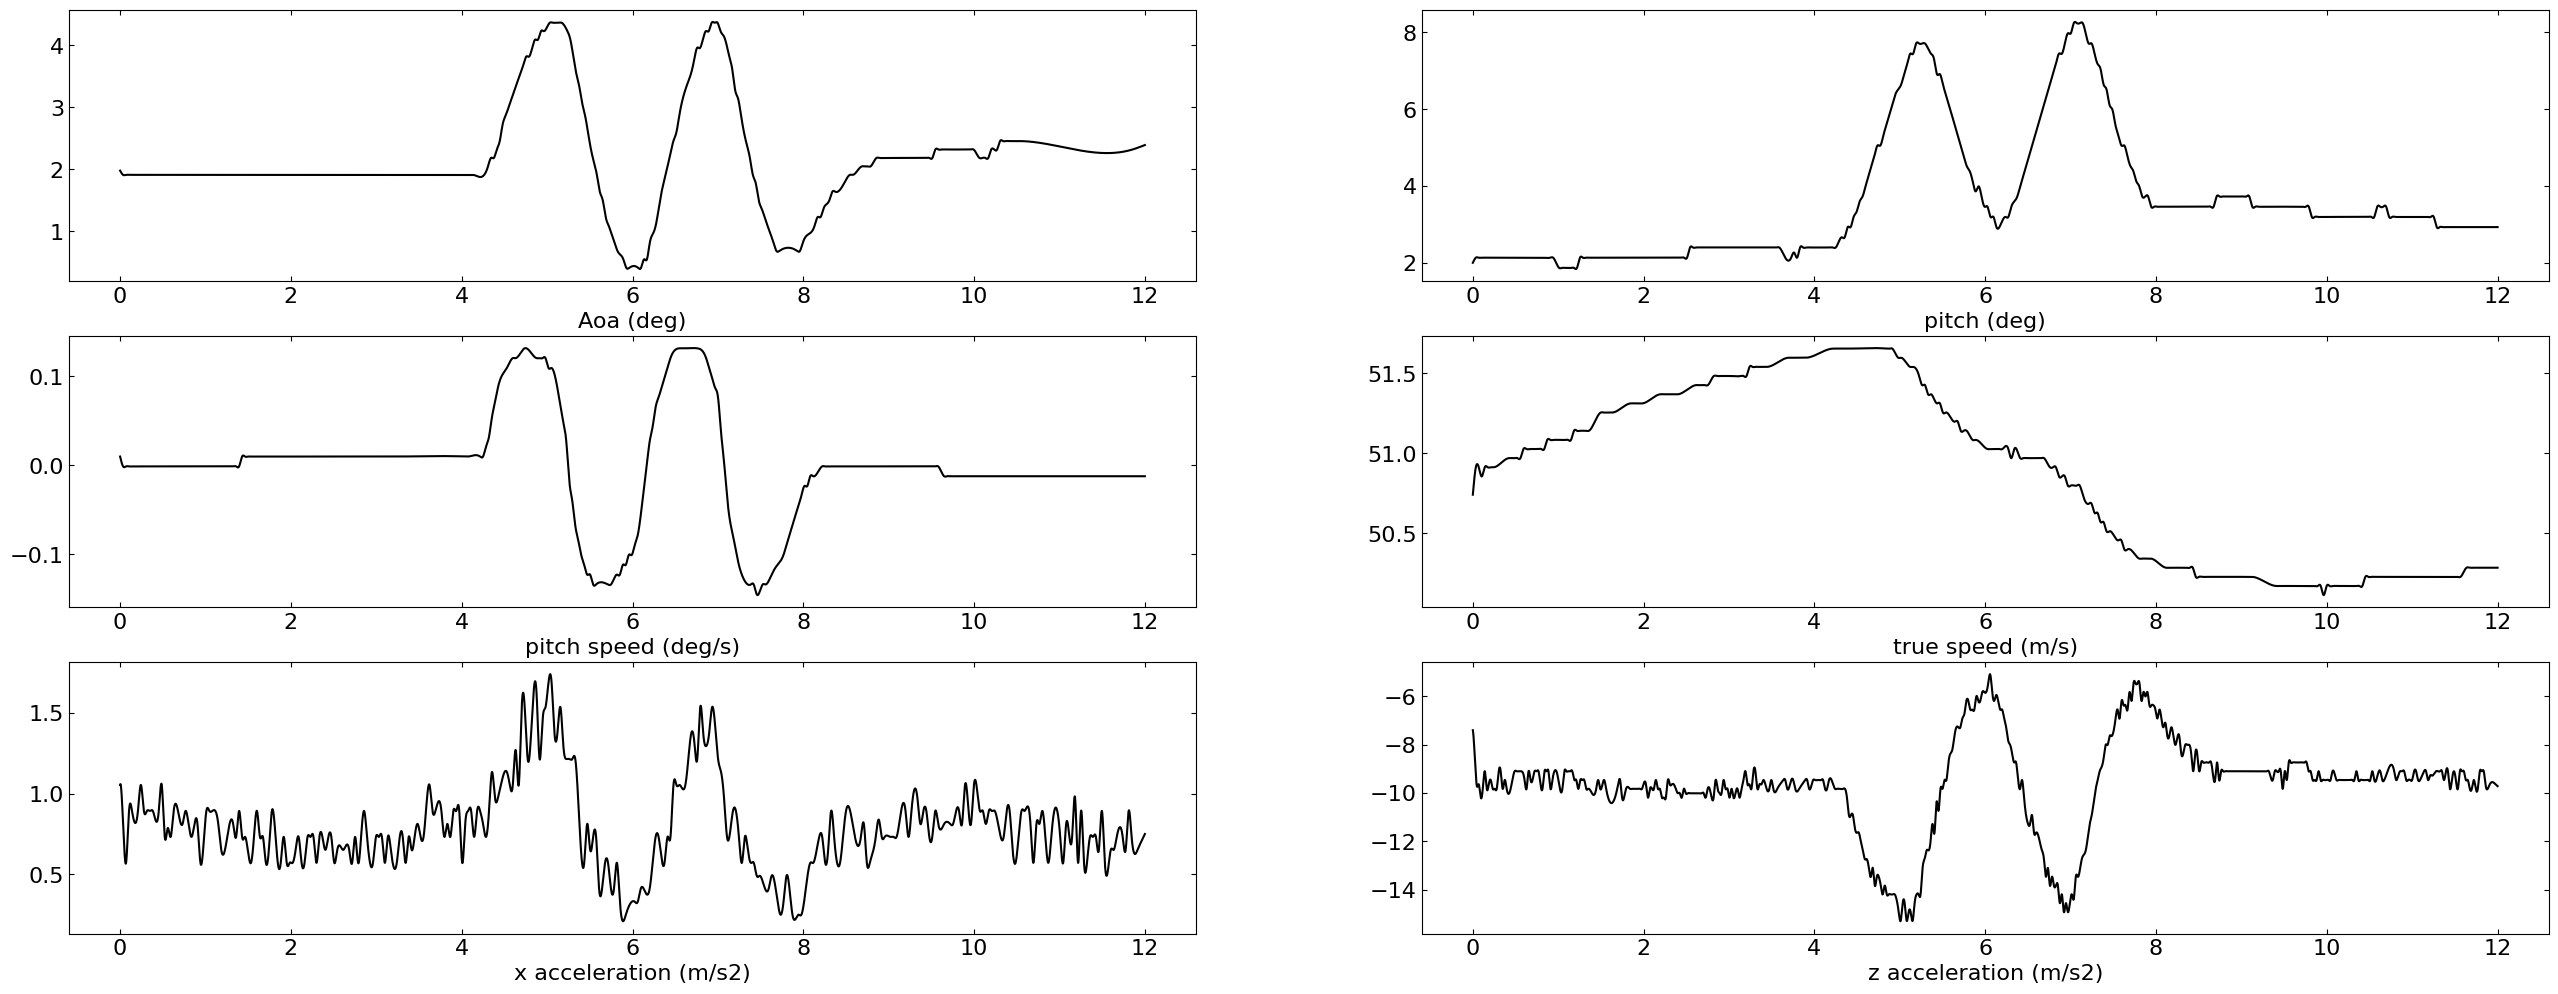

In [176]:
fig, ax = plt.subplots(3,2, figsize = (32,12))

ax[0,0].set_xlabel('Aoa (deg)', size = 16)
ax[0,0].plot(FLT_1['t(s)'],FLT_1['aoa (deg)'], color = 'black')
ax[0,0].tick_params (axis = "y", direction = "in", right = True, labelsize = 16)
ax[0,0].tick_params (axis = "x", direction = "in", top = True, labelsize = 16)

ax[0,1].set_xlabel('pitch (deg)', size = 16)
ax[0,1].plot(FLT_1['t(s)'],FLT_1['pitch (deg)'], color = 'black')
ax[0,1].tick_params (axis = "y", direction = "in", right = True, labelsize = 16)
ax[0,1].tick_params (axis = "x", direction = "in", top = True, labelsize = 16)

ax[1,0].set_xlabel('pitch speed (deg/s)' , size = 16)
ax[1,0].plot(FLT_1['t(s)'],FLT_1['pitch speed (deg/s)'], color = 'black')
ax[1,0].tick_params (axis = "y", direction = "in", right = True, labelsize = 16)
ax[1,0].tick_params (axis = "x", direction = "in", top = True, labelsize = 16)

ax[1,1].set_xlabel('true speed (m/s)' , size = 16)
ax[1,1].plot(FLT_1['t(s)'],FLT_1['true speed (m/s)'], color = 'black')
ax[1,1].tick_params (axis = "y", direction = "in", right = True, labelsize = 16)
ax[1,1].tick_params (axis = "x", direction = "in", top = True, labelsize = 16)

ax[2,0].set_xlabel('x acceleration (m/s2)',size = 16)
ax[2,0].plot(FLT_1['t(s)'],FLT_1['x acceleration (m/s2)'], color = 'black')
ax[2,0].tick_params (axis = "y", direction = "in", right = True, labelsize = 16)
ax[2,0].tick_params (axis = "x", direction = "in", top = True, labelsize = 16)

ax[2,1].set_xlabel('z acceleration (m/s2)', size = 16)
ax[2,1].plot(FLT_1['t(s)'],FLT_1['z acceleration (m/s2)'], color = 'black')
ax[2,1].tick_params (axis = "y", direction = "in", right = True, labelsize = 16)
ax[2,1].tick_params (axis = "x", direction = "in", top = True, labelsize = 16)

plt.show()


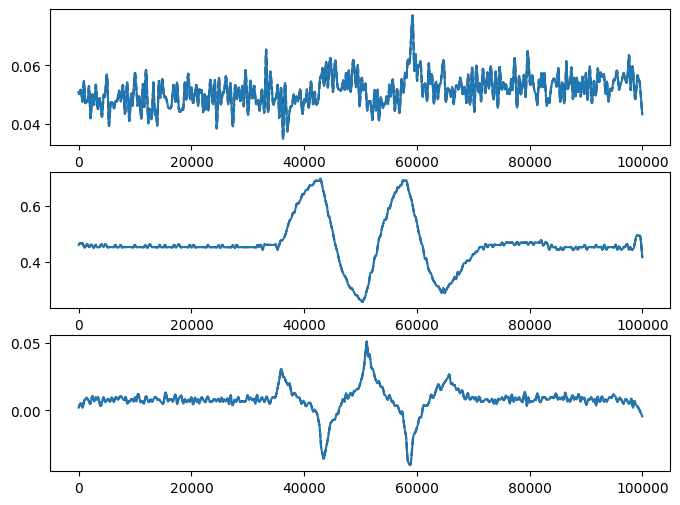

In [177]:
fig, ax = plt.subplots(3, figsize = (8,6))
ax[0].plot(FLT_1['Cd'], 'k--')
ax[0].plot(data_y['Cd'])
ax[1].plot(FLT_1['Cl'], 'k--')
ax[1].plot(data_y['Cl'])
ax[2].plot(FLT_1['Cm'], 'k--')
ax[2].plot(data_y['Cm'])



(10000, 7)
(10000, 3)
(10000, 7)
(10000, 3)
(79999, 7)
(79999, 3)


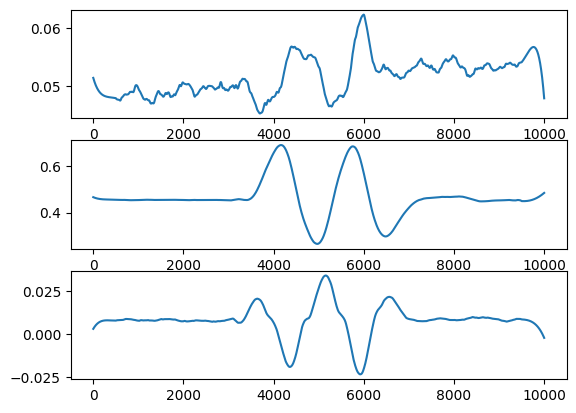

In [178]:
x = data_x[0:(len(data_x)-1)]
y = data_y[1:(len(data_y))]

x_main, x_test, y_main, y_test = train_test_split (x,y, test_size=10000)
x_training, x_validation, y_training, y_validation = train_test_split(x_main,y_main, test_size=10000)
print(x_test.shape)
print(y_test.shape)

print(x_validation.shape)
print(y_validation.shape)

print(x_training.shape)
print(y_training.shape)

time = pd.DataFrame(x_test['t(s)']).sort_index(axis = 0)

x_test = DataFrame.sort_index(x_test, ignore_index= True).drop(columns = 't(s)')
y_test = DataFrame.sort_index(y_test, ignore_index= True)

x_validation = DataFrame.sort_index(x_validation, ignore_index= True).drop(columns = 't(s)')
y_validation = DataFrame.sort_index(y_validation, ignore_index= True)

x_training = DataFrame.sort_index(x_training, ignore_index= True).drop(columns = 't(s)')
y_training = DataFrame.sort_index(y_training, ignore_index= True)

y_test = y_test[0:len(y_test)].to_numpy()
x_test = x_test[0:len(x_test)].to_numpy()

x_validation = x_validation[0:len(x_validation)].to_numpy()
y_validation = y_validation[0:len(y_validation)].to_numpy()

x_training = x_training[0:len(x_training)].to_numpy()
y_training = y_training[0:len(y_training)].to_numpy()

y1_t = y_test[:,0]
y2_t = y_test[:,1]
y3_t = y_test[:,2]

y1_t = savgol_filter(y1_t,window_length=1000, polyorder=4)
y2_t = savgol_filter(y2_t,window_length=1000, polyorder=4)
y3_t = savgol_filter(y3_t,window_length=1000, polyorder=4)

y_test = {'Cd':y1_t,
          'Cl':y2_t,
          'Cm':y3_t}

y_test = pd.DataFrame(y_test)
y_test = y_test.to_numpy()

fig, ax = plt.subplots(3)
ax[0].plot(y_test[:,0])
ax[1].plot(y_test[:,1])
ax[2].plot(y_test[:,2])


In [181]:

model = keras.Sequential([
    keras.layers.Dense(6 , input_shape= (6,)),
    keras.layers.Dense(7 ,activation = "sigmoid"),
    keras.layers.Dense(3 ,activation = "linear",),
])
from sklearn.metrics import r2_score
optimizer = keras.optimizers.Adam(learning_rate=0.0001)
model.compile (optimizer=optimizer,
               loss = 'MSE',
               metrics = [r2_score,"RootMeanSquaredError"], run_eagerly=True,
              
               )

history = model.fit(x_training, y_training, validation_data=[x_validation, y_validation], epochs = 1000, batch_size=2000)
model.summary()




Epoch 1/1000
40/40 [==============================] - 3s 83ms/step - loss: 0.1563 - r2_score: -3710.9126 - root_mean_squared_error: 0.3953 - val_loss: 0.1411 - val_r2_score: -6227.6162 - val_root_mean_squared_error: 0.3756
Epoch 2/1000
40/40 [==============================] - 3s 83ms/step - loss: 0.1240 - r2_score: -3125.0100 - root_mean_squared_error: 0.3521 - val_loss: 0.1034 - val_r2_score: -4758.8462 - val_root_mean_squared_error: 0.3216
Epoch 3/1000
40/40 [==============================] - 3s 85ms/step - loss: 0.0778 - r2_score: -2071.0444 - root_mean_squared_error: 0.2790 - val_loss: 0.0492 - val_r2_score: -2199.9316 - val_root_mean_squared_error: 0.2218
Epoch 4/1000
40/40 [==============================] - 3s 83ms/step - loss: 0.0302 - r2_score: -824.9759 - root_mean_squared_error: 0.1737 - val_loss: 0.0175 - val_r2_score: -859.2783 - val_root_mean_squared_error: 0.1323
Epoch 5/1000
40/40 [==============================] - 4s 93ms/step - loss: 0.0139 - r2_score: -344.7863 - root

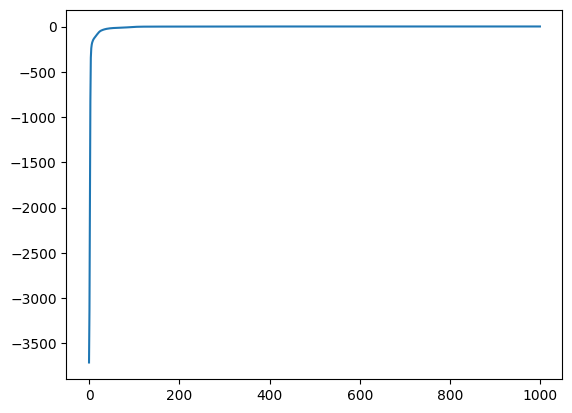

In [183]:
plt.plot(history.history['r2_score'])

In [ ]:
model_2 = keras.Sequential([
    keras.layers.Dense(6 , input_shape= (6,)),
    keras.layers.Dense(7 ,activation = "tanh"),
    keras.layers.Dense(3 ,activation = "linear",),
])
optimizer = keras.optimizers.Adam(learning_rate=0.0001)
model_2.compile (optimizer=optimizer,
               loss = 'MSE',
               metrics = ['RootMeanSquaredError']
               )

history_2 = model_2.fit(x_training, y_training, validation_data=[x_validation, y_validation], epochs = 1000, batch_size=100)
model_2.summary()



Epoch 1/1000
800/800 [==============================] - 3s 2ms/step - loss: 1.7164 - root_mean_squared_error: 1.3101 - val_loss: 0.9710 - val_root_mean_squared_error: 0.9854
Epoch 2/1000
800/800 [==============================] - 2s 2ms/step - loss: 0.6164 - root_mean_squared_error: 0.7851 - val_loss: 0.3437 - val_root_mean_squared_error: 0.5863
Epoch 3/1000
800/800 [==============================] - 2s 2ms/step - loss: 0.1947 - root_mean_squared_error: 0.4412 - val_loss: 0.0886 - val_root_mean_squared_error: 0.2977
Epoch 4/1000
800/800 [==============================] - 1s 2ms/step - loss: 0.0426 - root_mean_squared_error: 0.2064 - val_loss: 0.0146 - val_root_mean_squared_error: 0.1209
Epoch 5/1000
800/800 [==============================] - 1s 1ms/step - loss: 0.0067 - root_mean_squared_error: 0.0821 - val_loss: 0.0030 - val_root_mean_squared_error: 0.0550
Epoch 6/1000
800/800 [==============================] - 1s 2ms/step - loss: 0.0025 - root_mean_squared_error: 0.0502 - val_loss: 0

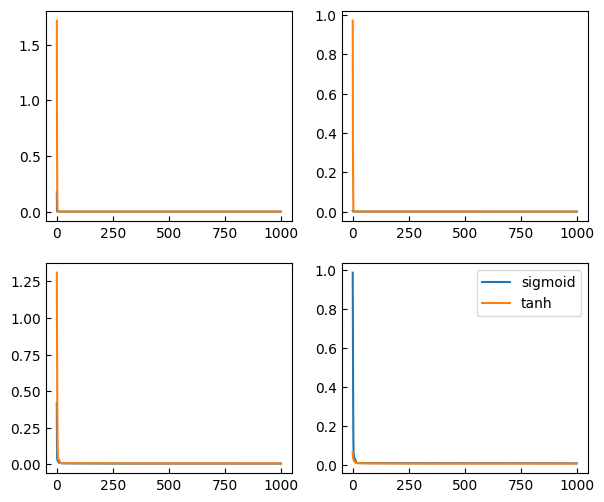

In [ ]:
fig, ax = plt.subplots(2,2, figsize = (7,6))

ax[0,0].plot(history.history['loss'], label="sigmoid")
ax[0,0].plot(history_2.history['loss'], label="tanh")
ax[0,0].tick_params (axis = "x", direction = "in")
ax[0,0].tick_params (axis = "y", direction = "in")


ax[0,1].plot(history.history['val_loss'], label="sigmoid")
ax[0,1].plot(history_2.history['val_loss'], label="tanh")
ax[0,1].tick_params (axis = "x", direction = "in")
ax[0,1].tick_params (axis = "y", direction = "in")

ax[1,0].plot(history.history['root_mean_squared_error'], label="sigmoid")
ax[1,0].plot(history_2.history['root_mean_squared_error'], label="tanh")
ax[1,0].tick_params (axis = "x", direction = "in")
ax[1,0].tick_params (axis = "y", direction = "in")

ax[1,1].plot(history_2.history['val_root_mean_squared_error'], label="sigmoid")
ax[1,1].plot(history.history['val_root_mean_squared_error'], label="tanh")
ax[1,1].tick_params (axis = "x", direction = "in")
ax[1,1].tick_params (axis = "y", direction = "in")

plt.legend()


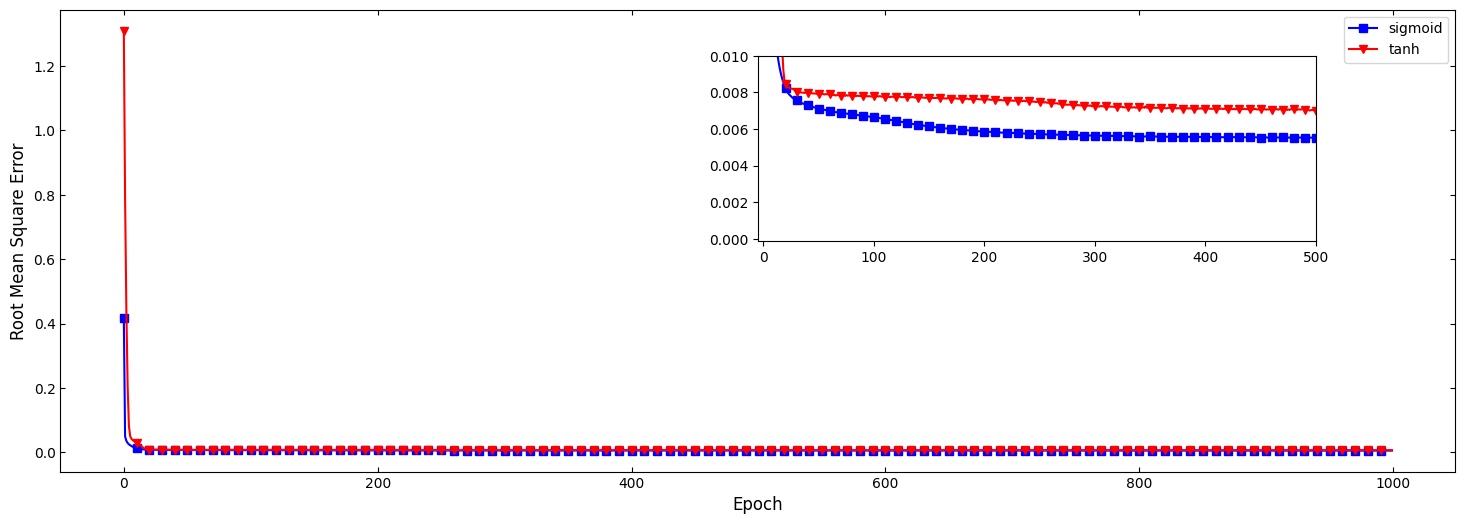

In [ ]:
fig, ax = plt.subplots(1,1, figsize = (18,6))
ax.plot(history.history['root_mean_squared_error'], color = "blue", marker = 's', markevery = 10, label = "sigmoid")
ax.plot(history_2.history['root_mean_squared_error'], color = "red", marker = 'v', markevery = 10, label = "tanh")
ax.tick_params(axis = "x", direction = "in", top = True)
ax.tick_params(axis = "y", direction = "in", right = True)
ax.set_xlabel('Epoch', size = 12)
ax.set_ylabel('Root Mean Square Error', size = 12 )

ax_zoom = ax.inset_axes([0.5,0.5,0.4,0.4])
ax_zoom.set_ylim(-0.0001,0.01)
ax_zoom.set_xlim(-5,500)
ax_zoom.plot(history.history['root_mean_squared_error'], color = "blue", marker = 's', markevery = 10, label = "sigmoid")
ax_zoom.plot(history_2.history['root_mean_squared_error'], color = "red", marker = 'v', markevery = 10, label = "tanh")

plt.legend()

In [186]:
y_pred = model.predict(x_test)
y_pred_2 = model_2.predict(x_test)

313/313 [==============================] - 0s 1ms/step


In [ ]:
y1 = y_pred[:,0]
y2 = y_pred[:,1]
y3 = y_pred[:,2]

y4 = y_pred_2[:,0]
y5 = y_pred_2[:,1]
y6 = y_pred_2[:,2]

y1 = savgol_filter(y1,window_length=4, polyorder=2)
y2 = savgol_filter(y2,window_length=4, polyorder=2)
y3 = savgol_filter(y3,window_length=4, polyorder=2)
y4 = savgol_filter(y4,window_length=4, polyorder=2)
y5 = savgol_filter(y5,window_length=4, polyorder=2)
y6 = savgol_filter(y6,window_length=4, polyorder=2)

y1_t = savgol_filter(y1_t,window_length=10, polyorder=4)
y2_t = savgol_filter(y2_t,window_length=10, polyorder=4)
y3_t = savgol_filter(y3_t,window_length=10, polyorder=4)

y_pred = {'Cd':y1,
          'Cl':y2,
          'Cm':y3}

y_pred_2 = {'Cd':y4,
            'Cl':y5,
            'Cm':y6}

FLT_1_Sigmoid = DataFrame(y_pred, columns=['Cd','Cl','Cm'])
FLT_1_Sigmoid.to_excel(excel_writer='FLT 1 sigmoid prediction savgol after.xlsx')
FLT_1_Tanh = DataFrame(y_pred_2, columns=['Cd','Cl','Cm'])
FLT_1_Sigmoid.to_excel(excel_writer='FLT 1 tanh prediction savgol after.xlsx')




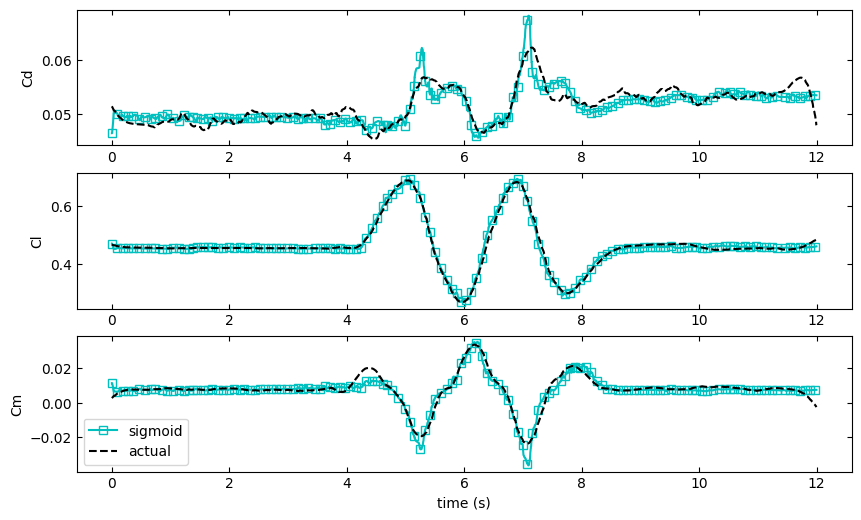

In [187]:

fig, ax = plt.subplots (3, figsize =(10,6) )
ax[0].plot(time, FLT_1_Sigmoid['Cd'], color = 'c', marker = 's', markerfacecolor = 'none' ,markevery = 75, label = 'sigmoid')
ax[0].plot(time, y_test[:,0], 'k--', label = 'actual')
ax[1].plot(time, FLT_1_Sigmoid['Cl'], color = 'c', marker = 's', markerfacecolor = 'none' ,markevery = 75, label = 'sigmoid')
ax[1].plot(time, y_test[:,1], 'k--', label = 'actual')
ax[2].plot(time, FLT_1_Sigmoid['Cm'], color = 'c', marker = 's', markerfacecolor = 'none' ,markevery = 75, label = 'sigmoid')
ax[2].plot(time, y_test[:,2], 'k--', label = 'actual')

ax[0].set_ylabel ('Cd')
ax[1].set_ylabel ('Cl')
ax[2].set_ylabel ('Cm')
ax[2].set_xlabel ('time (s)')



ax[0].tick_params (axis = "x", direction = "in", top = True)
ax[0].tick_params (axis = "y", direction = "in", right = True)
ax[1].tick_params (axis = "x", direction = "in", top = True)
ax[1].tick_params (axis = "y", direction = "in", right = True)
ax[2].tick_params (axis = "x", direction = "in", top = True)
ax[2].tick_params (axis = "y", direction = "in", right = True)

plt.legend()
plt.show()


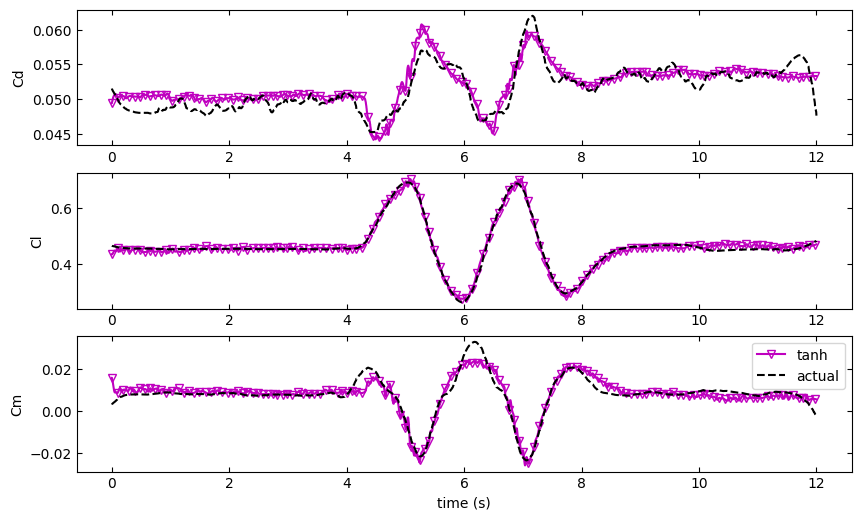

In [ ]:
fig, ax = plt.subplots (3, figsize =(10,6) )
ax[0].plot(time, FLT_1_Tanh['Cd'], color = 'm', marker = 'v', markerfacecolor = 'none',markevery = 75, label = 'tanh')
ax[0].plot(time, y_test[:,0], 'k--', label = 'actual')
ax[1].plot(time, FLT_1_Tanh['Cl'], color = 'm', marker = 'v', markerfacecolor = 'none',markevery = 75, label = 'tanh')
ax[1].plot(time, y_test[:,1], 'k--', label = 'actual')
ax[2].plot(time, FLT_1_Tanh['Cm'], color = 'm', marker = 'v', markerfacecolor = 'none',markevery = 75, label = 'tanh')
ax[2].plot(time, y_test[:,2], 'k--', label = 'actual')

ax[0].set_ylabel ('Cd')
ax[1].set_ylabel ('Cl')
ax[2].set_ylabel ('Cm')
ax[2].set_xlabel ('time (s)')

ax[0].tick_params (axis = "x", direction = "in", top = True)
ax[0].tick_params (axis = "y", direction = "in", right = True)
ax[1].tick_params (axis = "x", direction = "in", top = True)
ax[1].tick_params (axis = "y", direction = "in", right = True)
ax[2].tick_params (axis = "x", direction = "in", top = True)
ax[2].tick_params (axis = "y", direction = "in", right = True)

plt.legend()
plt.show()

In [189]:
Cd_1 = r2_score(y_test[:,0], FLT_1_Sigmoid['Cd'])
Cl_1 = r2_score(y_test[:,1], FLT_1_Sigmoid['Cl'])
Cm_1 = r2_score(y_test[:,2], FLT_1_Sigmoid['Cm'])
Cd_2 = r2_score(y_test[:,0], FLT_1_Tanh['Cd'])
Cl_2 = r2_score(y_test[:,1], FLT_1_Tanh['Cl'])
Cm_2 = r2_score(y_test[:,2], FLT_1_Tanh['Cm'])
Overall_1 = r2_score(y_test, FLT_1_Sigmoid)
Overall_2 = r2_score(y_test, FLT_1_Tanh)


r_squared_table = {'Activation Function': ['Sigmoid','Tanh'],
                   'Cd': [Cd_1,Cd_2],
                   'Cl': [Cl_1,Cl_2],
                   'Cm': [Cm_1,Cm_2],
                   'Overall': [Overall_1,Overall_2]}

r_squared_table = pd.DataFrame(r_squared_table)
r_squared_table


,Activation Function,Cd,Cl,Cm,Overall
0,Sigmoid,0.753637,0.988183,0.912908,0.884909
1,Tanh,0.751421,0.980845,0.892864,0.875044
